## Task #6 

## Prediction using Decision Tree Algorithm

### Author : Gaurav Khare

● Create the Decision Tree classifier and visualize it graphically. 

● The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly 

● Dataset : https://bit.ly/3kXTdox


In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data
data = pd.read_csv("Iris (1).csv")
print("Data imported successfully")

Data imported successfully


In [3]:
data_original=data.copy()

In [4]:
# Top 5 Rows of the dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Botom 5 Rows of the dataset
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
#Droping theIdcolumn
data.drop(['Id'],axis=1,inplace= True)

In [7]:
data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [8]:
# data['Species'] = data['Species'].replace(0,"Iris-versicolor")
# data['Species'] = data['Species'].replace(1,"Iris-setosa")
# data['Species'] = data['Species'].replace(2,"Iris-virginica")

In [9]:
# Determining the shape of the dataset
print("There are total %d columns in the dataset." %data.shape[1])
print("There are total %d rows in the dataset." %data.shape[0])

There are total 5 columns in the dataset.
There are total 150 rows in the dataset.


In [10]:
# Basic Information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# data['Species']=data['Species'].astype('category').cat.codes 

In [12]:
data['Species'].value_counts()


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [13]:
# Determining the Datatype of the dataset
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [14]:
# Determining the unique values in the dataset
data.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [15]:
#Determining the missing values in the dataset
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
#Determining the null values in the dataset
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
# Descriptive Statistics of the dataset
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


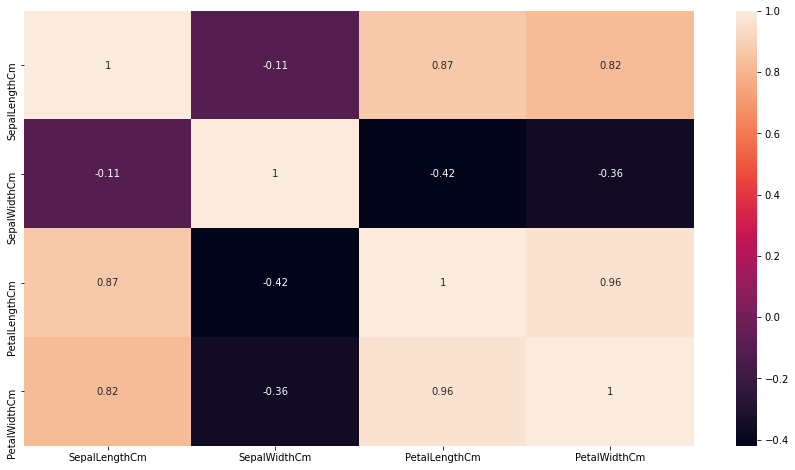

In [19]:
plt.figure(figsize = (15,8))        
sns.heatmap(data.corr(),annot = True)
plt.show()

### Determining Outliers in the dataset

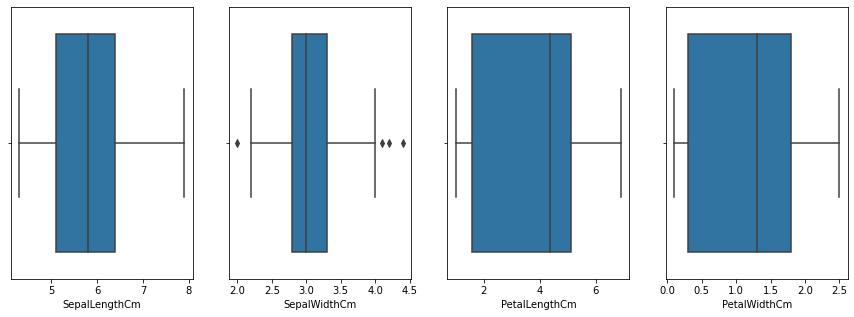

In [20]:
plt.figure(figsize = (15,5))
outliers=data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
feature = outliers
for i in enumerate(feature):
    plt.subplot(1,4, i[0]+1)
    sns.boxplot(data[i[1]])

In [21]:
# outlier treatment for sepal Width Cm
q1_SepalWidthCm = data['SepalWidthCm'].quantile(0.01)
q4_SepalWidthCm= data['SepalWidthCm'].quantile(0.95)
data['SepalWidthCm'] = np.where(data['SepalWidthCm'] <=q1_SepalWidthCm, q1_SepalWidthCm,data['SepalWidthCm'])
data['SepalWidthCm'] = np.where(data['SepalWidthCm'] >=q4_SepalWidthCm, q1_SepalWidthCm,data['SepalWidthCm'])


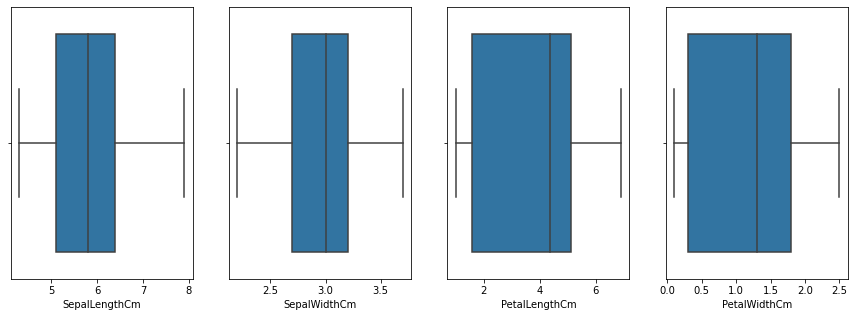

In [22]:
plt.figure(figsize = (15,5))
feature = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
for i in enumerate(feature):
    plt.subplot(1,4, i[0]+1)
    sns.boxplot(data[i[1]])

In [23]:
# #use of Standard Scaling Technique for Scaling of the variables
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

In [24]:
# data.columns

In [25]:
# vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']
# data[vars] = scaler.fit_transform(data[vars])
# data.head()

In [26]:
# Putting feature variable to X
X = data.drop('Species',axis=1)

# Putting response variable to y
y = data['Species']

In [27]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [28]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((105, 4), (105,), (45, 4), (45,))

### Without setting any hyper-parameters

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [30]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

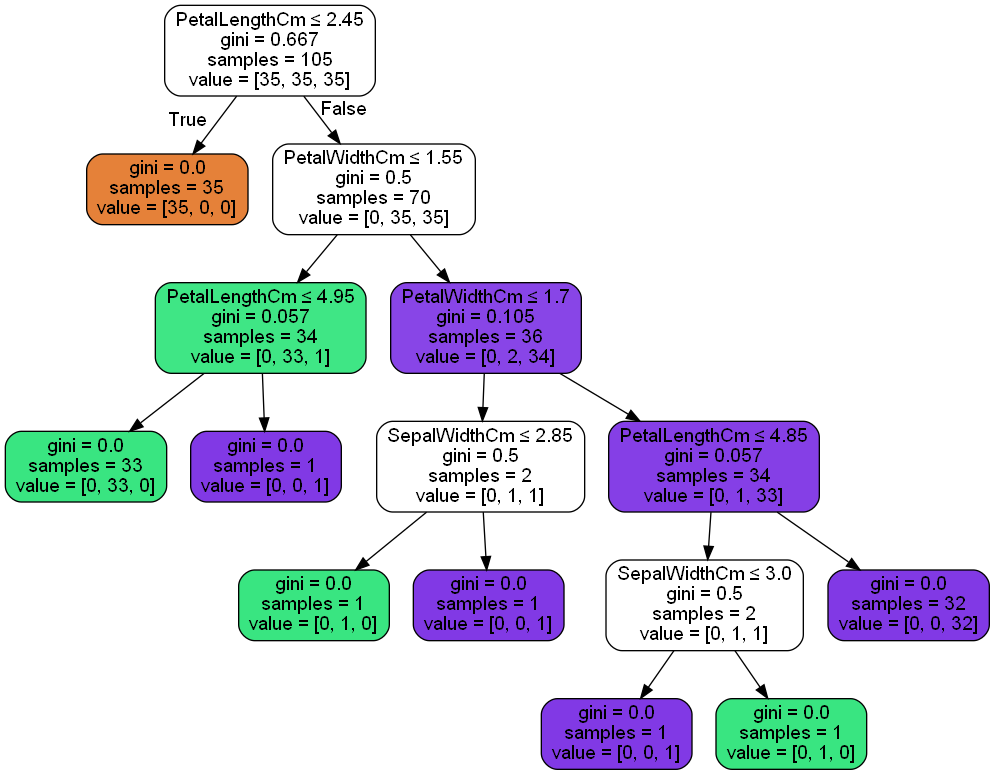

In [31]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=X.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Evaluating model performance

In [32]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [34]:
print('Accuracy score for Training Dataset = ', accuracy_score(y_train,y_train_pred))

Accuracy score for Training Dataset =  1.0


With out setting any hyper-parameters the model is overfitting, 
as it is able to classify them with 100% accuracy, let us now check on the test data

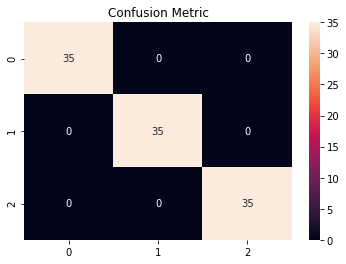

In [35]:
cm=confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot = True)
plt.title("Confusion Metric")
plt.show()

In [36]:
from sklearn.metrics import classification_report
print("Classification Report \n",classification_report(y_train,y_train_pred))

Classification Report 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       1.00      1.00      1.00        35
 Iris-virginica       1.00      1.00      1.00        35

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



In [37]:
print('Accuracy score for Testing Dataset = ', accuracy_score(y_test,y_test_pred))

Accuracy score for Testing Dataset =  0.9333333333333333


The accuracy of the test dataset is 93%,  the variance is too high for the model. 

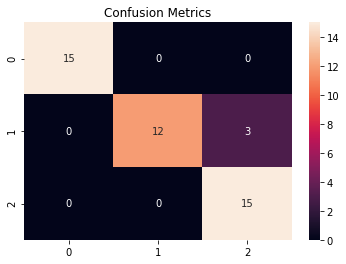

In [38]:
cm=confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot = True)
plt.title("Confusion Metrics")
plt.show()

In [39]:
print("Classification Report \n",classification_report(y_test,y_test_pred))

Classification Report 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.80      0.89        15
 Iris-virginica       0.83      1.00      0.91        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



### Hyper-parameter tuning

In [40]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
params = {"max_depth": [None, 3, 5, 10],
            "max_features": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2),
            "criterion": ["gini", "entropy"]}

In [41]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [42]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 720 candidates, totalling 2880 fits
Wall time: 22.2 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10],
                         'max_features': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
             scoring='accuracy', verbose=1)

In [43]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_features=2,
                       min_samples_leaf=3, random_state=42)

In [44]:
dt_g= grid_search.best_estimator_

In [45]:
dt_g.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_features=2,
                       min_samples_leaf=3, random_state=42)

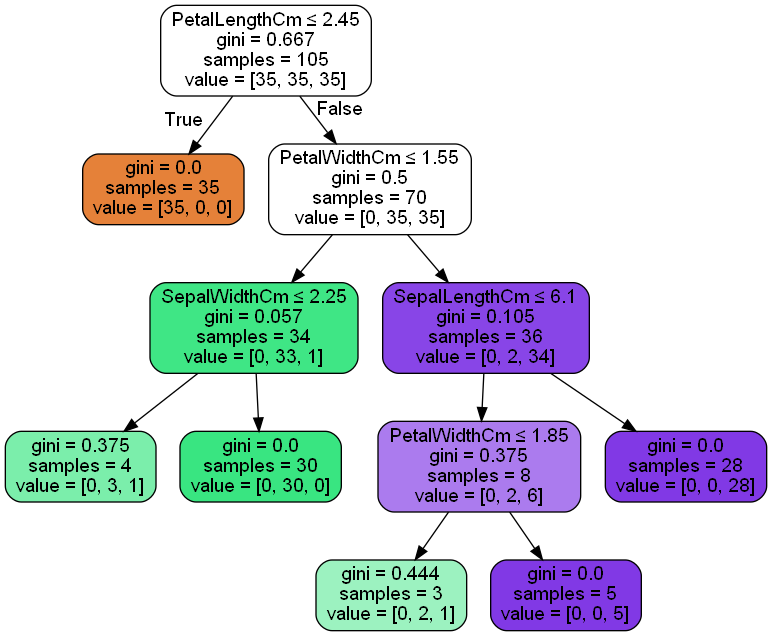

In [46]:
dot_data = StringIO()
export_graphviz(dt_g, out_file=dot_data, feature_names=X.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [47]:
y_train_pred = dt_g.predict(X_train)
y_test_pred = dt_g.predict(X_test)

In [48]:
print('Accuracy score for Training Dataset = ', accuracy_score(y_train,y_train_pred))

Accuracy score for Training Dataset =  0.9809523809523809


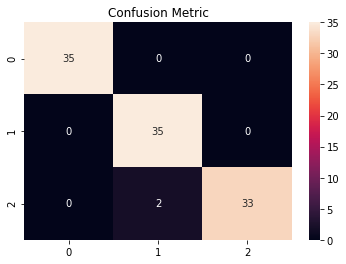

In [49]:
cm=confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot = True)
plt.title("Confusion Metric")
plt.show()

In [50]:
print("Classification Report \n",classification_report(y_train,y_train_pred))

Classification Report 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       0.95      1.00      0.97        35
 Iris-virginica       1.00      0.94      0.97        35

       accuracy                           0.98       105
      macro avg       0.98      0.98      0.98       105
   weighted avg       0.98      0.98      0.98       105



In [51]:
print('Accuracy score for Testing Dataset = ', accuracy_score(y_test,y_test_pred))

Accuracy score for Testing Dataset =  0.8444444444444444


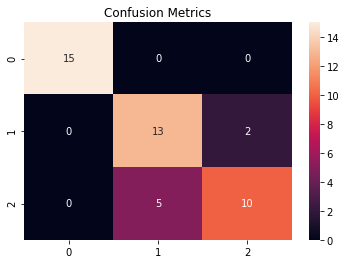

In [52]:
cm=confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot = True)
plt.title("Confusion Metrics")
plt.show()

In [53]:
print("Classification Report \n",classification_report(y_test,y_test_pred))

Classification Report 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.72      0.87      0.79        15
 Iris-virginica       0.83      0.67      0.74        15

       accuracy                           0.84        45
      macro avg       0.85      0.84      0.84        45
   weighted avg       0.85      0.84      0.84        45



With Hyper parameter tuning, the accuracy of the train data set is 98% as against 84% for test data set, this means that this model willnot be able to classify the correctly

In [54]:
data_original["Predicted"]=pd.DataFrame(dt.predict(X_test))

In [55]:
data_original.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-virginica
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-versicolor
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-virginica
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-virginica
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-virginica


### Feeding new data to the classifier to predict the right class

In [56]:
SepalLengthCm = 4.8
SepalWidthCm = 2.9
PetalLengthCm = 1.3
PetalWidthCm = 0.2

In [58]:
x = [[SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]]
res = dt.predict(x)
print("The class predicted is --> " + str(*res))

The class predicted is --> Iris-setosa
